### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [138]:
# Clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
from sklearn.neighbors.nearest_centroid import NearestCentroid
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd

In [139]:
A=pd.read_csv('vehicle.csv',index_col=0)

In [140]:
A=A.dropna()
A.head(5)

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
compactness,,,,,,,,,,,,,,,,,,
95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [141]:
A.columns

Index(['circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [142]:
A['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

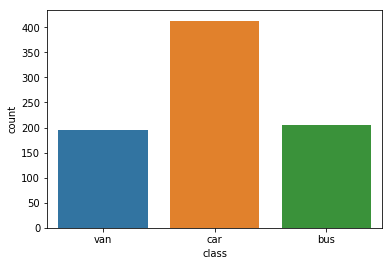

In [143]:
sns.countplot('class',data=A)

### Check for any missing values in the data 

In [144]:
A.info() # there are missing values in some columns 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 95 to 85
Data columns (total 18 columns):
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio                  813 non-null int64
class            

### 3. Standardize the data 

In [145]:
X=A.drop('class',axis=1,inplace=False).apply(zscore)


In [146]:
y=A['class']

In [152]:
X

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,,,,,,,,,,,,,,,,,
95,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
91,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
104,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
93,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
85,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531
97,-0.293543,-0.573312,0.116137,0.404751,-0.556023,-0.470734,0.129648,-0.606014,-0.337462,-0.397397,-0.441776,-0.069700,-0.856567,1.351690,-1.310052,1.792048,1.118521
90,-0.293543,-1.017098,-0.360128,0.404751,0.085785,-0.954676,0.899019,-0.994877,-0.130505,-0.846883,-0.898494,-0.317284,-0.722724,-0.681472,-1.085874,0.653818,0.848040
86,-1.758654,-1.270690,-0.866160,-0.097251,-0.342087,-1.408372,1.668390,-1.383740,-1.441236,-1.521112,-1.229615,-1.926579,-1.124255,-0.884788,0.147109,1.792048,1.659484
86,-1.433074,-0.763506,-0.776860,-0.097251,0.085785,-1.075662,1.155476,-0.994877,-1.234278,-1.135838,-0.984129,-1.462359,-0.856567,-0.884788,-0.301249,0.816422,0.848040


Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [161]:
# k means determine k
distortions = []


You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [162]:
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(
       sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0])

### 6. Plotting Elbow/ Scree Plot

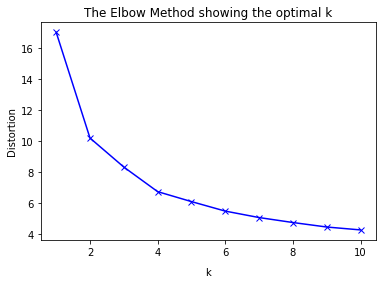

In [163]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k',labelpad=10)
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [ ]:
kmeans = KMeans(n_clusters=3) the probable optimal value of K is 3

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [ ]:
clf = NearestCentroid()
clf.fit(X, clusters)
print(clf.centroids_)

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [ ]:
column=['circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio']

Hint: Use pd.Dataframe function 

In [ ]:
pd.DataFrame(clf.centroids_,columns=column)

### Use kmeans.labels_ function to print out the labels of the classes

In [ ]:
clusters = kmeans.labels_
clusters

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [ ]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [ ]:
X = np.concatenate((a, b,c),)

### 10. Use scatter matrix to print all the 3 distributions

In [ ]:
print(X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

### 11. Find out the linkage matrix

In [ ]:
# generate the linkage matrix
Z = linkage(X, 'ward', metric='euclidean')

Use ward as linkage metric and distance as Eucledian

### 12. Plot the dendrogram for the consolidated dataframe

In [ ]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

### 13. Recreate the dendrogram for last 12 merged clusters 

In [ ]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
)
plt.show()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d = 100
clusters = fcluster(Z, max_d, criterion='distance')
clusters

In [ ]:
clf = NearestCentroid()
clf.fit(X, clusters)
print(clf.centroids_)

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [ ]:
df=pd.DataFrame(X)
df['clusters']=clusters

In [167]:
print(df[df['clusters']==1])
print(df[df['clusters']==2])
print(df[df['clusters']==3])

            0         1  clusters
0    9.010445 -0.264043         1
1   10.611213  0.728878         1
2    8.977567  3.360356         1
3    7.252709 -2.797246         1
4   10.117173  2.351610         1
5   11.302106  1.968709         1
6    7.738844  0.365528         1
7    7.923964 -2.252760         1
8   10.670856 -1.886087         1
9    6.031094  1.550478         1
10   8.312440 -3.521498         1
11   8.544487 -0.955358         1
12  11.934497 -4.542832         1
13   9.219687 -5.153648         1
14  10.964941 -1.761343         1
15   8.140853  0.944049         1
16   8.926920  1.791525         1
17   9.498571  0.798225         1
18   9.018579 -1.041884         1
19  11.704213 -5.006831         1
20   6.578470 -1.131254         1
21  10.181404  0.335922         1
22   8.890774  0.028478         1
23  10.212399  2.907995         1
24  10.171340  0.487245         1
25  12.095944 -0.568198         1
26  11.056558 -2.566659         1
27   8.564039  3.818463         1
28   9.820159 

### Use matplotlib to visually observe the clusters in 2D space 

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()